![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import mode

In [3]:
#importing data
customer_df = pd.read_csv('C:/Users/aguva/Ironhack/Week_10/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
# Drop the column of Customer
customer_df = customer_df.drop(['Customer'], axis=1)

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [9]:
# Check the numerical variables
numerical_df = customer_df.select_dtypes(np.number)

In [11]:
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [5]:
# Select only th categorical columns

categorical_df = customer_df.select_dtypes(object)

In [6]:
categorical_df

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


2. Plot all the categorical variables with the proper plot. What can you see?

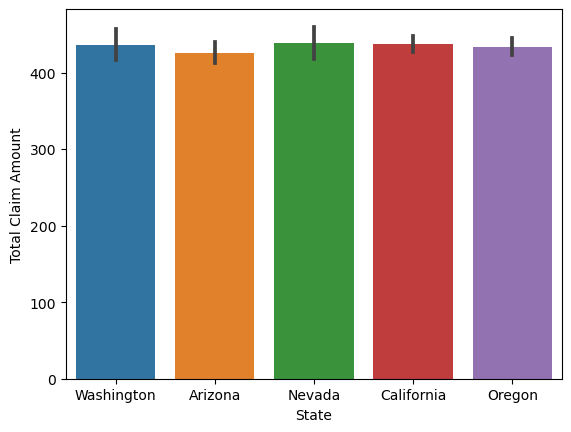

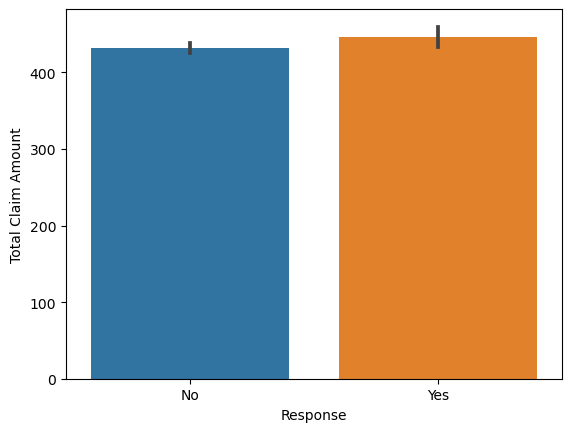

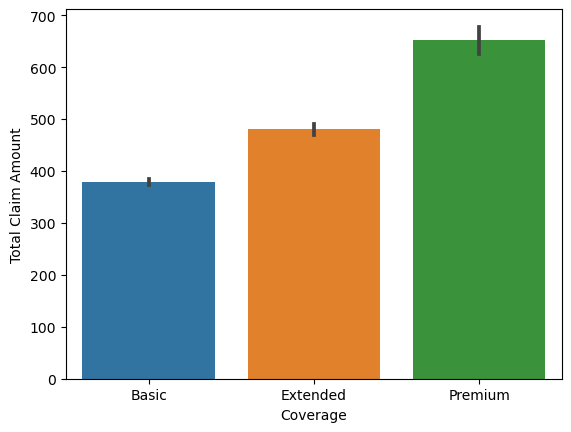

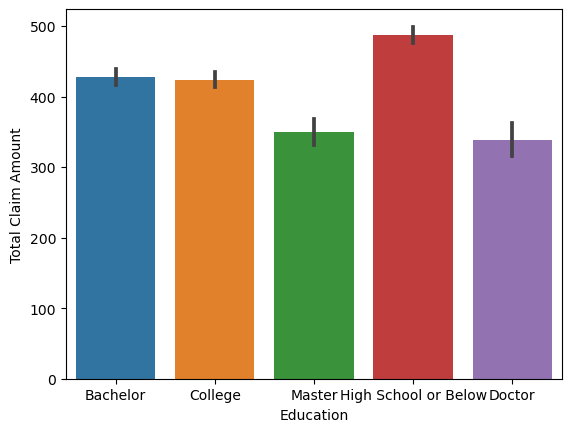

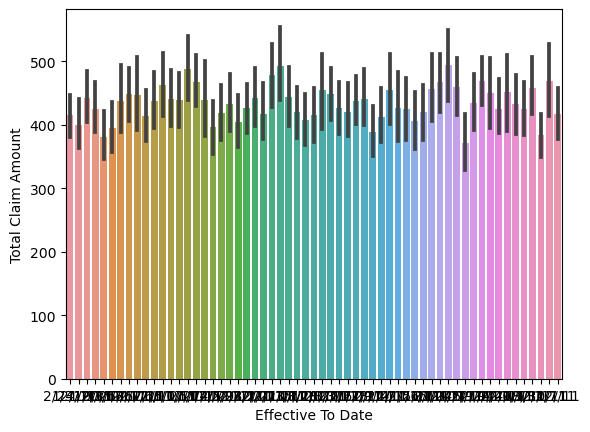

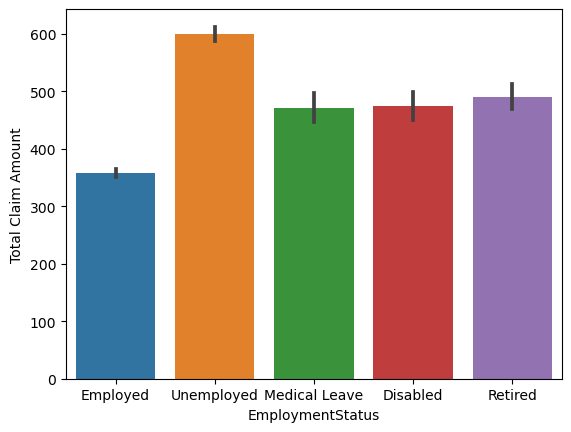

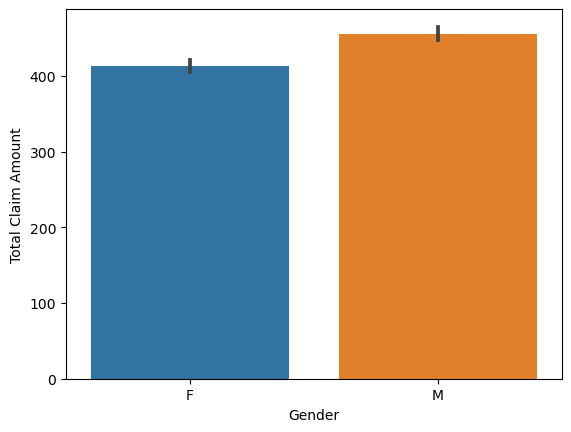

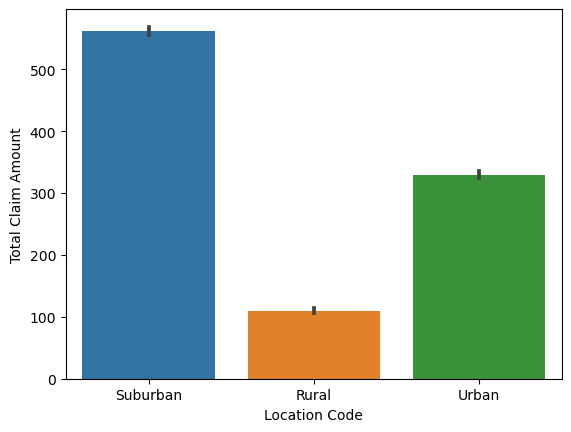

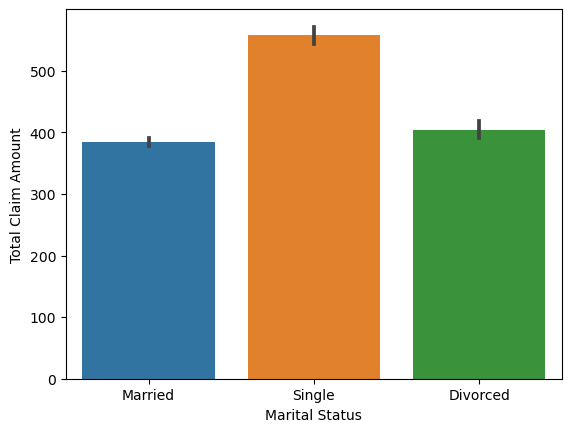

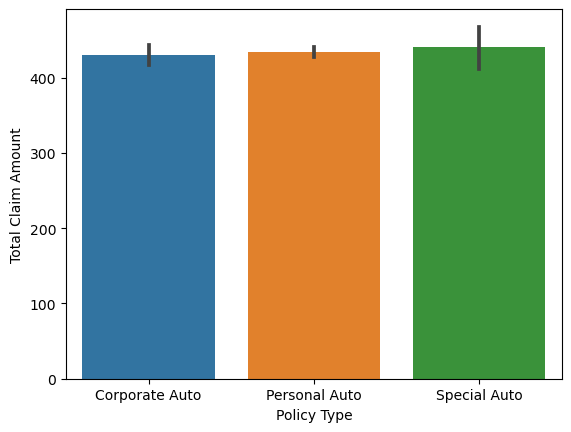

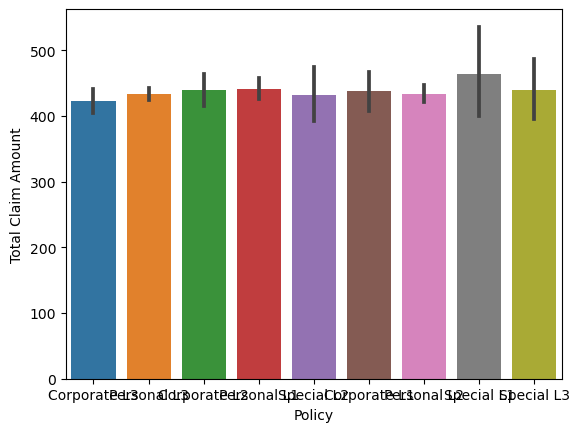

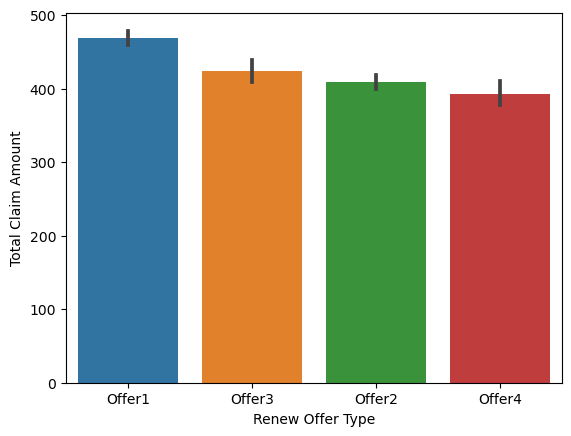

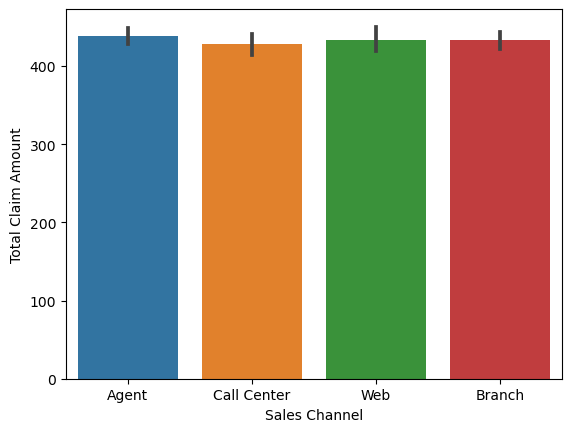

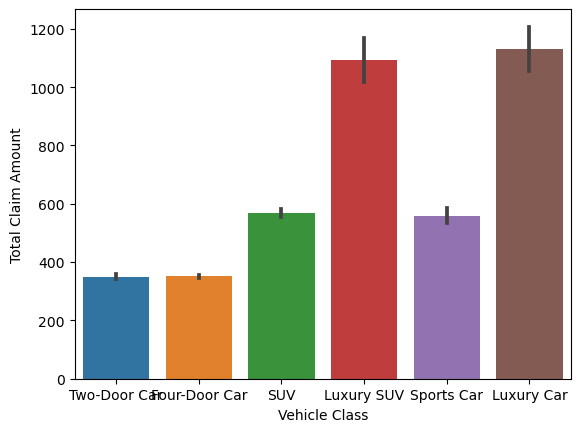

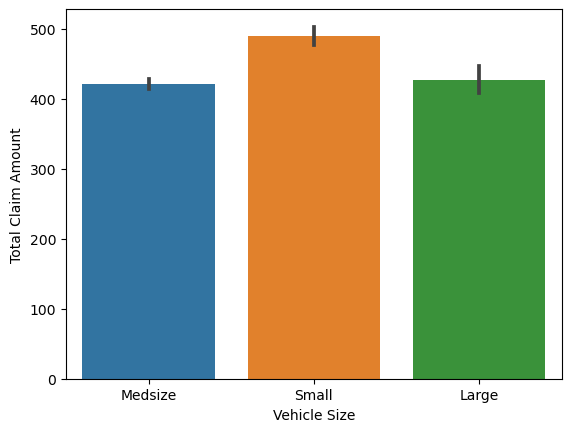

In [14]:
# Visually analyzing categorical data with Target variable

for column in categorical_df.columns:

    sns.barplot(x=categorical_df[column], y=customer_df['Total Claim Amount'], data=categorical_df)
    plt.show()

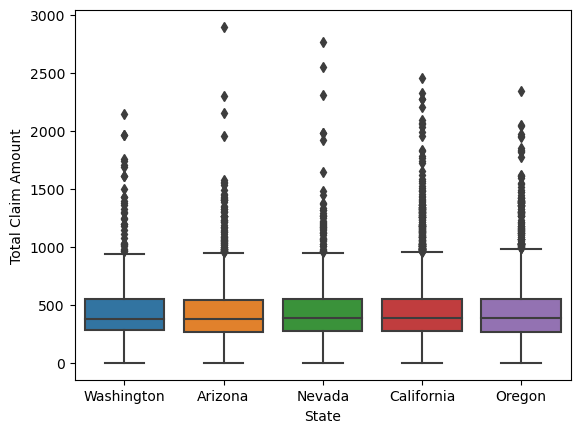

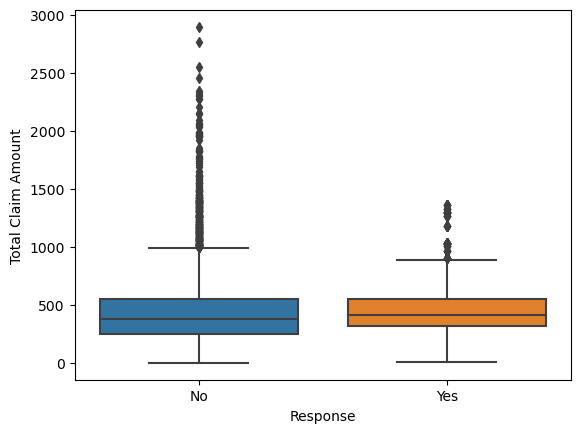

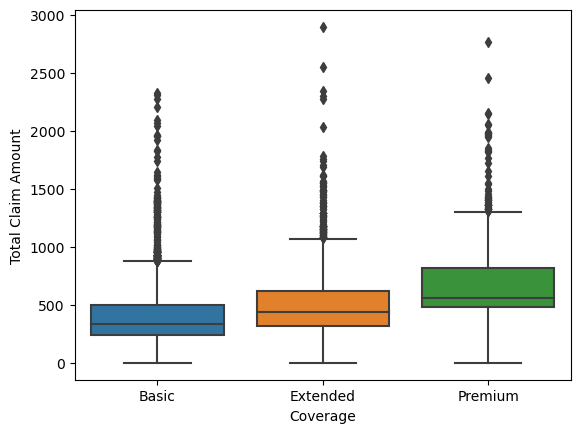

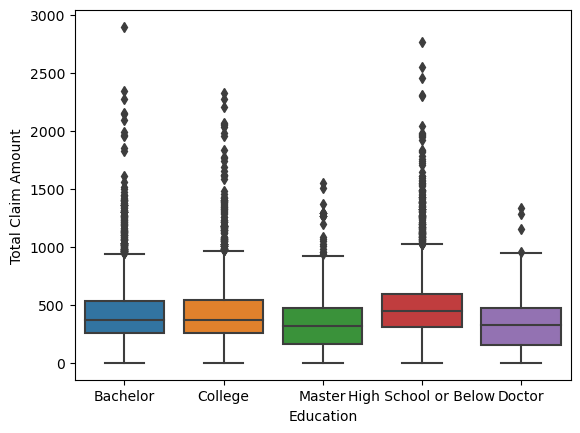

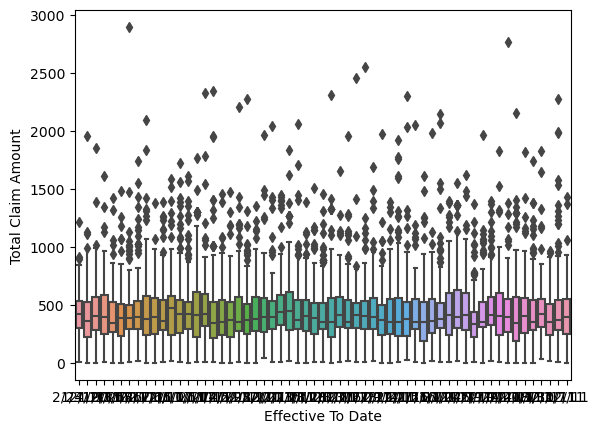

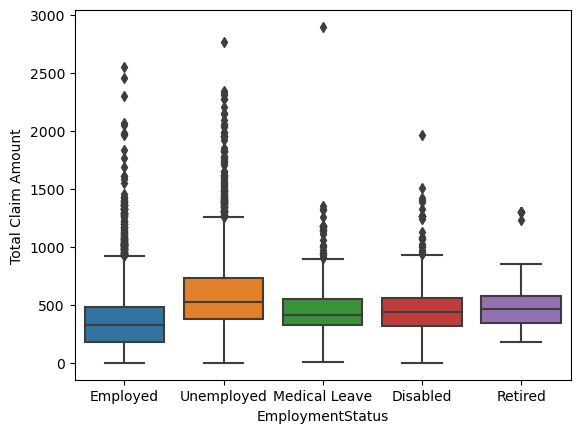

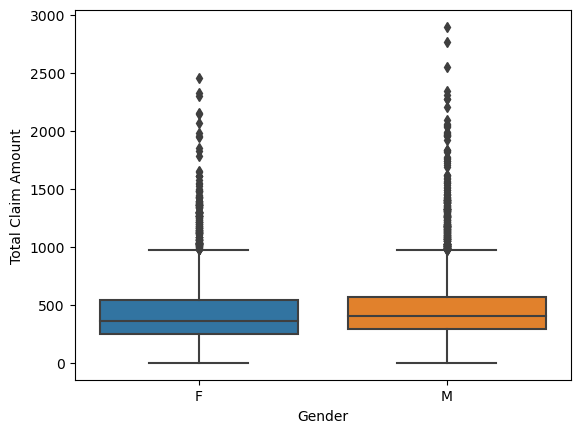

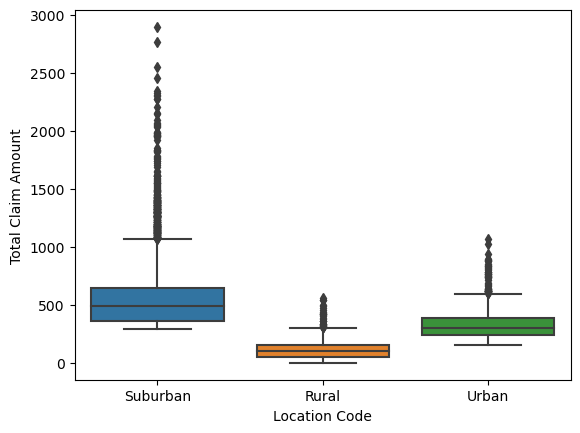

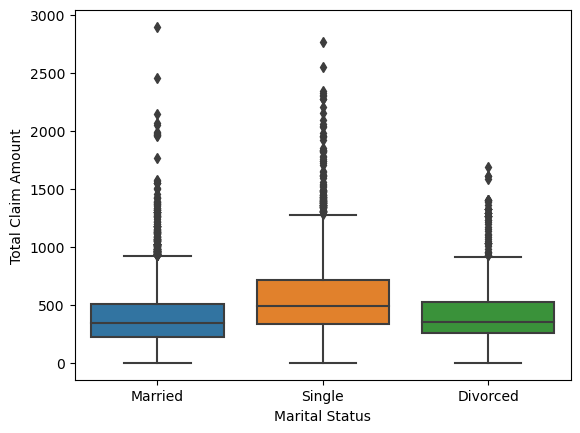

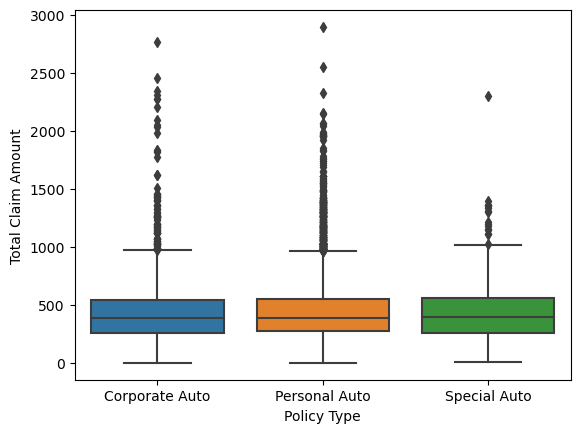

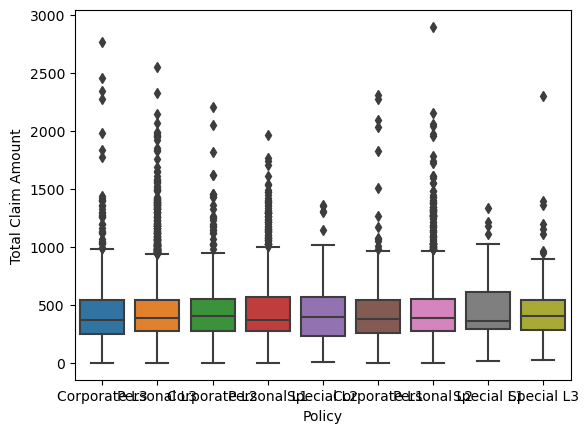

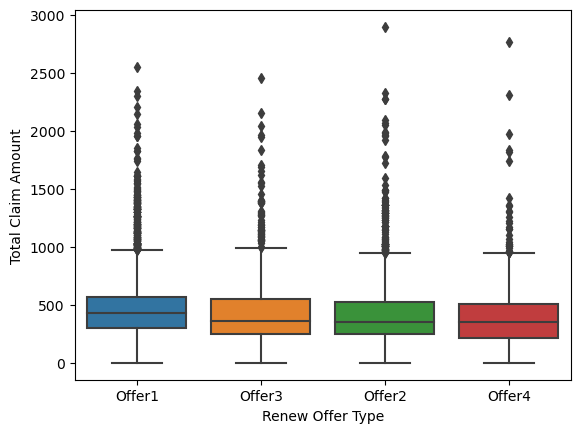

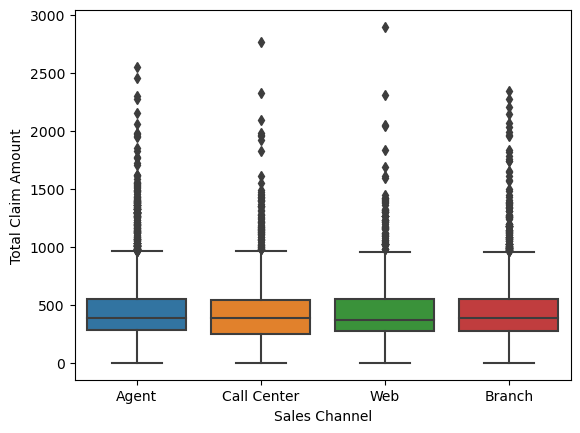

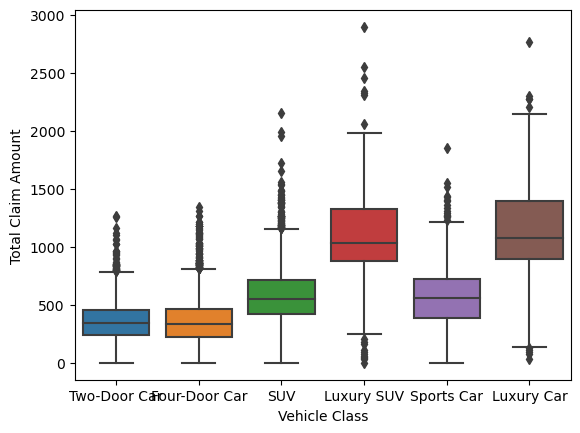

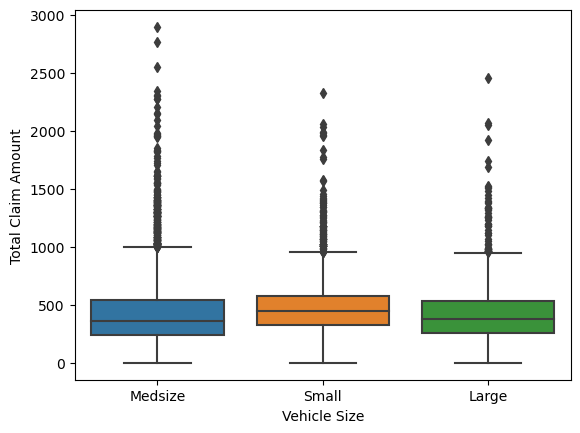

In [17]:
for column in categorical_df.columns:
    sns.boxplot(x=column, y=customer_df['Total Claim Amount'], data=categorical_df)
    plt.show()

### Conclusión:

Con el grafico de barra vemos la distribucion de las categorias

Veo que en su mayoria las variables categoricas se encuentras desbalanceadas, excepto para los caso:
 - Vehicule Size
 - Sales Channel
 - State
 - Policy Type
 - Gender

Tambien es importante destacar la cantidad de outlier que hay en cada una de las variables categoricas (entiendo al igual que en otros ejercicios fue considerada como Carible Objetivo 'Total Claim Amount')

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [19]:
# Checking for null values
nulls = pd.DataFrame(customer_df.isna().sum()/len(categorical_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,State,0.0
12,Months Since Last Claim,0.0
21,Vehicle Class,0.0
20,Total Claim Amount,0.0
19,Sales Channel,0.0
18,Renew Offer Type,0.0
17,Policy,0.0
16,Policy Type,0.0
15,Number of Policies,0.0
14,Number of Open Complaints,0.0


Consider redundante tener el tamaño del Vehicle Class si no tambien el Vehicle Size, considero que aporta mas valor Vehicle Class. Así como Channel y el Renew Offer Type, considero mas relevante el Sale Channel.

Eliminaria las siguientes categorias:

 - Effective To Date
 - Vehicle Size
 - Renew Offer Type
 - Policy
 - Location Code


Me quedaría con:
 - Customer Lifetime Value
 - Income
 - EmploymentStatus
 - State
 - Responde
 - Coverage
 - Eduaction
 - Gender
 - Marital Status
 - Vehicle Class
 - Months Since Policy Inception
 - Policy Type
 - Sales Channel

Considero estas variables como interesantes para la prediccion de la Variable Objetivo.

4. Plot time variable. Can you extract something from it?


In [ ]:
customer_df

In [ ]:
sns.barplot(x=categorical_df[column], y=customer_df['Total Claim Amount'], data=categorical_df)
    plt.show()